<a href="https://colab.research.google.com/github/Samuel-OR/DataScientist/blob/main/Analisando_os_Dados_do_Airbnb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Sua Cidade*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade ________, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [83]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/france/ile-de-france/paris/2021-07-06/visualisations/listings.csv")

## Análise dos Dados


**Dicionário das variáveis**

* `id` - número de id gerado para identificar o imóvel
* `name` - nome da propriedade anunciada
* `host_id` - número de id do proprietário (anfitrião) da propriedade
* `host_name` - Nome do anfitrião
* `neighbourhood_group` - esta coluna não contém nenhum valor válido
* `neighbourhood` - nome do bairro
* `latitude` - coordenada da latitude da propriedade
* `longitude` - coordenada da longitude da propriedade
* `room_type` - informa o tipo de quarto que é oferecido
* `price` - preço para alugar o imóvel
* `minimum_nights` - quantidade mínima de noites para reservar
* `number_of_reviews` - número de reviews que a propriedade possui
* `last_review` - data do último review
* `reviews_per_month` - quantidade de reviews por mês
* `calculated_host_listings_count` - quantidade de imóveis do mesmo anfitrião
* `availability_365` - número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [10]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2577,Loft for 4 by Canal Saint Martin,2827,Karine,NaN,Entrepôt,48.86957,2.36127,Entire home/apt,125,3,1,2019-01-02,0.03,1,364
1,5396,Explore the heart of old Paris,7903,Borzou,NaN,Hôtel-de-Ville,48.85247,2.35835,Entire home/apt,64,1,250,2020-08-08,2.63,1,23
2,7397,MARAIS - 2ROOMS APT - 2/4 PEOPLE,2626,Franck,NaN,Hôtel-de-Ville,48.85909,2.35315,Entire home/apt,93,9,273,2020-02-26,2.26,2,209
3,7964,Large & sunny flat with balcony !,22155,Anaïs,NaN,Opéra,48.87417,2.34245,Entire home/apt,130,6,6,2015-09-14,0.07,1,352
4,9359,"Cozy, Central Paris: WALK or VELIB EVERYWHERE !",28422,Bernadette,NaN,Louvre,48.86006,2.34863,Entire home/apt,75,180,0,NaN,NaN,1,358


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [13]:
# identificar o volume de dados do DataFrame
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 51040
Variáveis:	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [16]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.243358
last_review                       0.243358
host_name                         0.001587
name                              0.000960
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

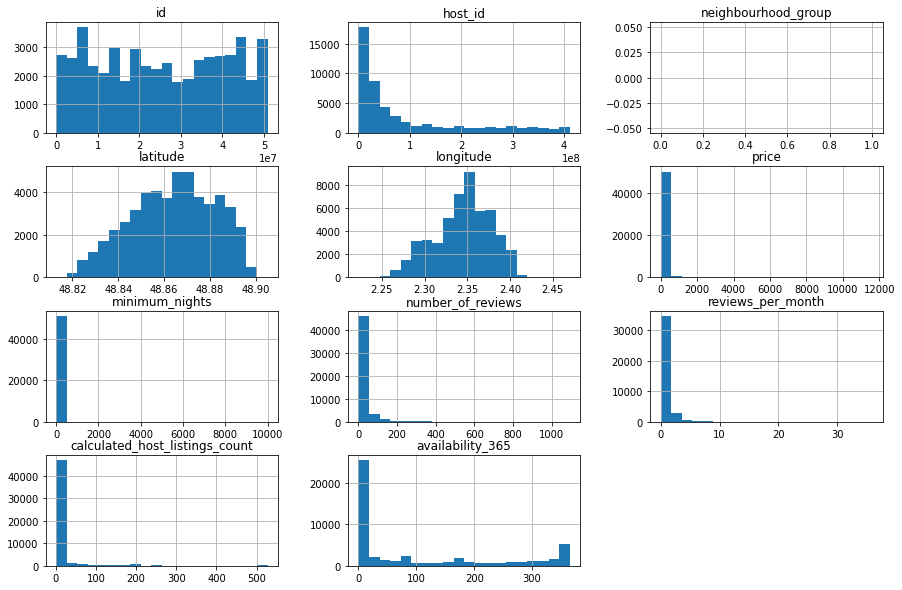

In [18]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 20, figsize=(15,10));

### **Q4. Há *outliers* presentes?**

Pela distribuição do histograma, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights` e `calculated_host_listings_count`.

Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [51]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,51039.000000,51039.000000,51039.000000,38618.000000,51039.000000,51039.000000
mean,124.528067,111.044926,20.262094,0.711938,14.816101,105.076099
std,246.525733,163.825613,43.403481,1.058297,61.756449,134.747537
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,60.000000,2.000000,1.000000,0.120000,1.000000,0.000000
50%,85.000000,4.000000,5.000000,0.360000,1.000000,18.000000
75%,130.000000,365.000000,20.000000,0.900000,2.000000,200.000000
max,11600.000000,1125.000000,1093.000000,35.880000,527.000000,365.000000


Olhando o resumo estatístico acima, podemos confirmar algumas hipóteses como:

* A variável `price` possui 75% do valor abaixo de 130, porém seu valor máximo é 11600.
* Até 75% das pessoas lugam por até 365 noites (`minimum_nights`).
* Provavlemnte há muitos outliers na varivél `minimum_nights` pois além da média de noites ser grande é visto que o desvio padrão também é um valor alto.


#### Boxplot para minimum_nights

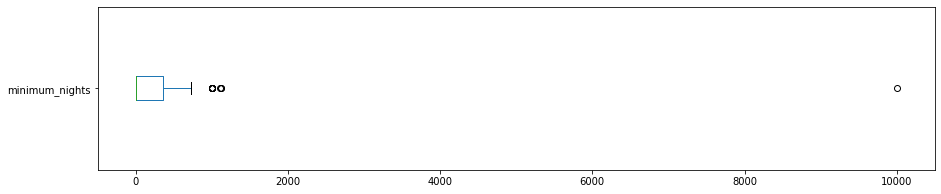

minimum_nights | Valores acima de 365:
21 entradas
0.0411%


In [76]:
# minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

days = 365
# ver quantidade de valores acima de *** dias para minimum_nights
print("minimum_nights | Valores acima de {}:".format(days))
print("{} entradas".format(len(df[df.minimum_nights > days])))
print("{:.4f}%".format((len(df[df.minimum_nights > days]) / df.shape[0])*100))

#### Boxplot para price

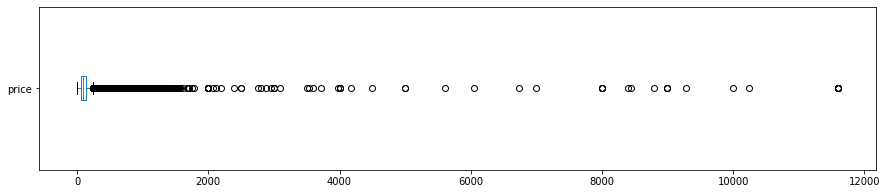


price: valores acima de 300
2609 entradas
5.1117%


In [77]:
# price
df.price.plot(kind='box', vert=False, figsize=(15, 3),)
plt.show()

valor = 300
# ver quantidade de valores acima de 130 para price
print("\nprice: valores acima de {}".format(valor))
print("{} entradas".format(len(df[df.price > valor])))
print("{:.4f}%".format((len(df[df.price > valor]) / df.shape[0])*100))

# df.price.plot(kind='box', vert=False, xlim=(0,1300), figsize=(15,3));

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

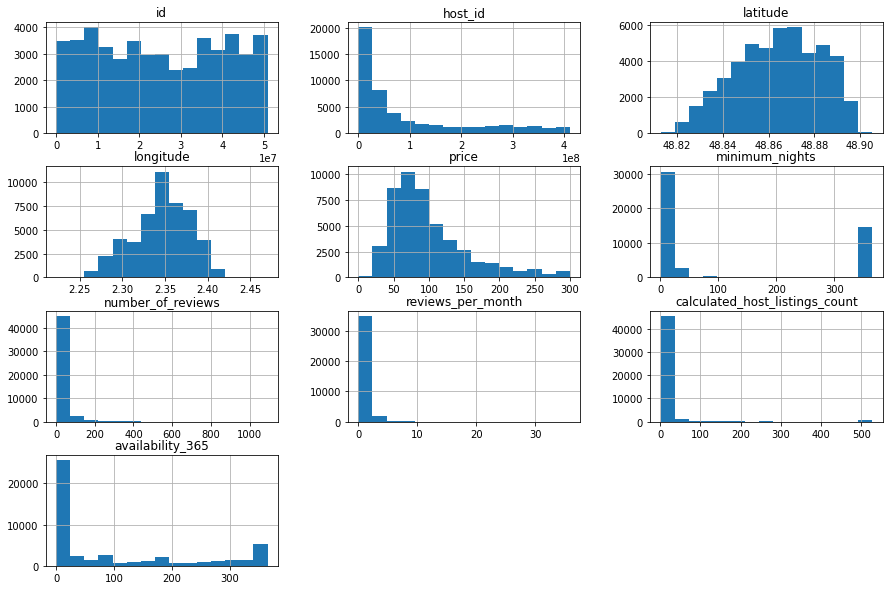

In [78]:

# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 300].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 365].index, axis=0, inplace=True)
#df_clean.drop(df[df.minimum_nights > 8000].index, axis=0, inplace=False)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

In [112]:
#Top 5 Pacotes de noites mais adquiridos
(df_clean.minimum_nights.value_counts().head() / df_clean.minimum_nights.sum() )*100

365    0.262625
1      0.161444
2      0.150747
3      0.104191
4      0.048551
Name: minimum_nights, dtype: float64

### **Q5. Qual a média dos preços de aluguel?**

In [ ]:
# ver a média da coluna `price``


### **Q6. Qual a correlação existente entre as variáveis**

In [80]:
# criar uma matriz de correlação
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.123230,0.029948,0.063166,0.098191,0.287078
minimum_nights,-0.123230,1.000000,-0.203032,-0.260067,-0.114973,-0.285327
number_of_reviews,0.029948,-0.203032,1.000000,0.705155,-0.020695,0.190713
reviews_per_month,0.063166,-0.260067,0.705155,1.000000,0.027126,0.253455
calculated_host_listings_count,0.098191,-0.114973,-0.020695,0.027126,1.000000,0.114793
availability_365,0.287078,-0.285327,0.190713,0.253455,0.114793,1.000000


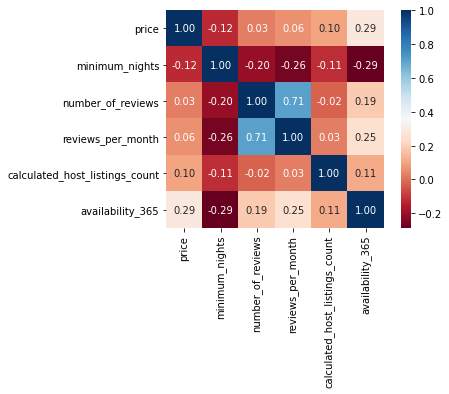

In [87]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True,);

### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

In [88]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    39927
Private room        7102
Hotel room          1028
Shared room          353
Name: room_type, dtype: int64

In [91]:
# mostrar a porcentagem de cada tipo de imóvel disponível
(df_clean.room_type.value_counts() / df_clean.shape[0] )*100

Entire home/apt    82.476761
Private room       14.670523
Hotel room          2.123528
Shared room         0.729188
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média


In [ ]:
# plotar os imóveis pela latitude-longitude


### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``

## Conclusões
